<a href="https://colab.research.google.com/github/BrunaFerreira/Mestrado_UNIFESP/blob/main/1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0. Bibliotecas a serem utilizadas


In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import PIL
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os
import shutil
from sklearn.model_selection import train_test_split
import random
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

## 1. Copiar arquivos do github para Drive pessoal

In [2]:
'''
Copiar arquivos do repositorio publico
--- Abrir uma pasta no Drive
%cd /content/drive/MyDrive/0_Mestrado_unifesp/3_Pesquisa/Experimentos/Code

--- Clonar repositorio
!git clone --filter=blob:none --no-checkout https://github.com/ArsoVukicevic/Assessment-of-pSS-from-SGUS-images.git
!cp -r  Assessment-of-pSS-from-SGUS-images  /content/drive/MyDrive/0_Mestrado_unifesp/3_Pesquisa/Experimentos/Code/Assessment-of-pSS-from-SGUS-images

'''

'\nCopiar arquivos do repositorio publico\n--- Abrir uma pasta no Drive\n%cd /content/drive/MyDrive/0_Mestrado_unifesp/3_Pesquisa/Experimentos/Code\n\n--- Clonar repositorio\n!git clone --filter=blob:none --no-checkout https://github.com/ArsoVukicevic/Assessment-of-pSS-from-SGUS-images.git\n!cp -r  Assessment-of-pSS-from-SGUS-images  /content/drive/MyDrive/0_Mestrado_unifesp/3_Pesquisa/Experimentos/Code/Assessment-of-pSS-from-SGUS-images\n\n'

## 2. Leitura dos dados (imagens de glandulas salivares)

In [3]:
dir = "/content/drive/MyDrive/0_Mestrado_unifesp/3_Pesquisa/Experimentos/Code"
df = pd.read_excel(open(dir +'/HarmonicSS_Info.xlsx', 'rb'))
# Renomeia as colunas
df.columns = ['Center','ID','Gland_Type','Machine', 'DeVita_Score', 'Omeract_Score','Sex','Age','Disease_Duration','Label_pSS']
## Retira uma imagem que tem a classificação 2
df = df[df['Label_pSS']!=2]
# Coluna de rótulo convertida para texto
df['Label_pSS'] = df['Label_pSS'].astype(str)
# Inclui zeros a esquerda para o código ID
df['ID'] = df['ID'].apply(lambda x: '{0:0>3}'.format(x))
# Formata o nome do arquivo de cada imagem
df['Image'] = df['ID'].astype(str) + '.jpg'
df_label  = df [['Image','Label_pSS']]
df['Faixa_Etaria'] = np.where(df['Age'] > 40, 'Above 40', 'Under 40')
df.head(2)

,Center,ID,Gland_Type,Machine,DeVita_Score,Omeract_Score,Sex,Age,Disease_Duration,Label_pSS,Image,Faixa_Etaria
0,Udine (Italy),001,submandibular,samsung,3,3,F,72.0,18,1,001.jpg,Above 40
1,Udine (Italy),002,parotid,samsung,2,3,F,72.0,18,1,002.jpg,Above 40


213.jpg


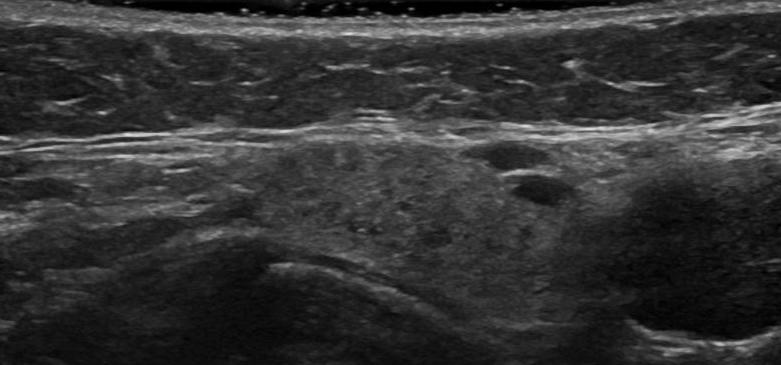

In [4]:
dir = "/content/drive/MyDrive/0_Mestrado_unifesp/3_Pesquisa/Experimentos/Code/dataset"
# Exemplo de visualização de uma imagem
img_dir = dir + "/images"
image_extensions = ['.jpg', '.jpeg', '.png']
images = [filename for filename in os.listdir(img_dir) if os.path.splitext(filename)[-1] in image_extensions]
print(images[0])
PIL.Image.open(img_dir + '/' + str(images[0]))

### Distribuição por Genero

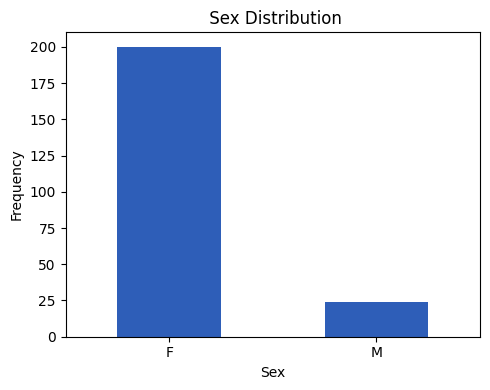

In [5]:
df['Sex'].value_counts().plot(kind='bar', color=['#2e5eb8'], figsize=(5, 4))
plt.title(' Sex Distribution')
plt.xlabel('Sex')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.tight_layout()


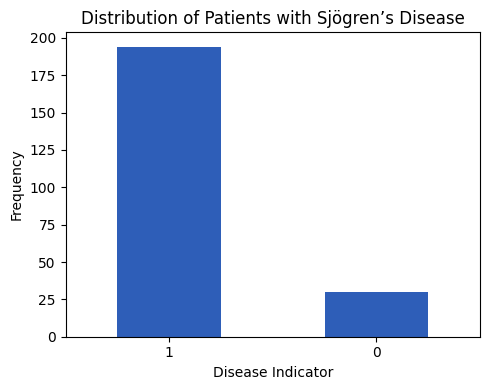

In [6]:
df['Label_pSS'].value_counts().plot(kind='bar', color=['#2e5eb8'], figsize=(5, 4))
plt.title('Distribution of Patients with Sjögren’s Disease')
plt.xlabel('Disease Indicator')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.tight_layout()

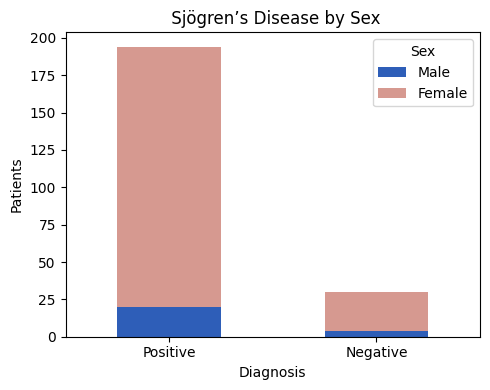

In [7]:
positivos = df[df['Label_pSS'] == '1']['Sex'].value_counts()
negativos = df[df['Label_pSS'] == '0']['Sex'].value_counts()

# Criar DataFrame para gráfico
data = pd.DataFrame({
    'Male': [positivos.get('M', 0), negativos.get('M', 0)],
    'Female': [positivos.get('F', 0), negativos.get('F', 0)]
}, index=['Positive', 'Negative'])
data.plot(kind='bar', stacked=True, color=['#2e5eb8', '#d69990'], figsize=(5, 4))

# Personalizar gráfico
plt.title(' Sjögren’s Disease by Sex')
plt.xlabel('Diagnosis')
plt.ylabel('Patients')
plt.xticks(rotation=0)
plt.legend(title='Sex')

plt.tight_layout()


### Distribuição por Idade

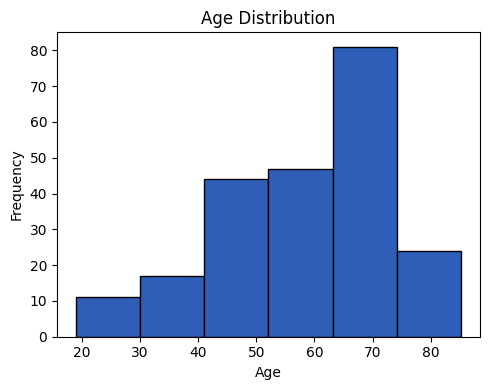

In [8]:
df['Age'].plot(kind='hist', bins=6, edgecolor='black', color=['#2e5eb8'], figsize=(5, 4))

# Personalizar gráfico
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

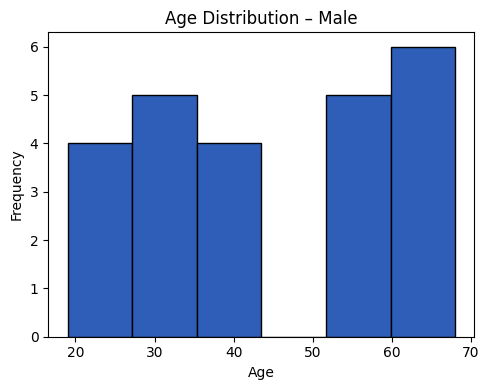

In [9]:
df_M = df[df['Sex'] == 'M']
df_M['Age'].plot(kind='hist', bins=6, edgecolor='black', color=['#2e5eb8'], figsize=(5, 4))

# Personalizar gráfico
plt.title('Age Distribution – Male')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

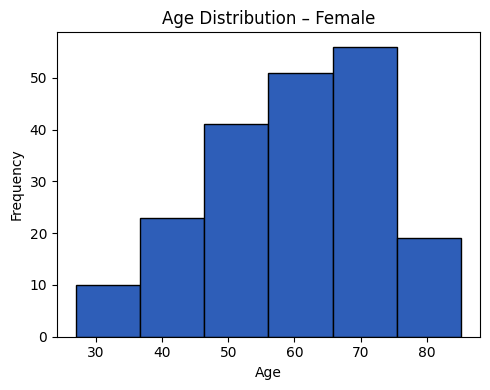

In [10]:
df_F = df[df['Sex'] == 'F']
df_F['Age'].plot(kind='hist', bins=6, edgecolor='black', color=['#2e5eb8'], figsize=(5, 4))

# Personalizar gráfico
plt.title('Age Distribution – Female')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

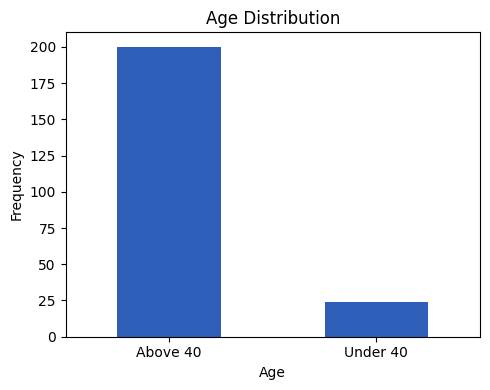

In [11]:
df['Faixa_Etaria'].value_counts().plot(kind='bar', color=['#2e5eb8'], figsize=(5, 4))
plt.title('Age Distribution')
plt.xlabel('Age')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.tight_layout()

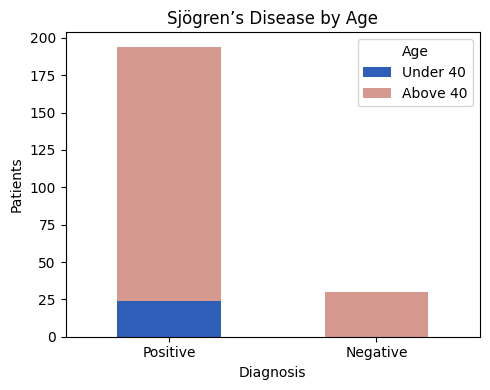

In [12]:
positivos = df[df['Label_pSS'] == '1']['Faixa_Etaria'].value_counts()
negativos = df[df['Label_pSS'] == '0']['Faixa_Etaria'].value_counts()

# Criar DataFrame para gráfico
data = pd.DataFrame({
    'Under 40': [positivos.get('Under 40', 0), negativos.get('Under 40', 0)],
    'Above 40': [positivos.get('Above 40', 0), negativos.get('Above 40', 0)]
}, index=['Positive', 'Negative'])
data.plot(kind='bar', stacked=True, color=['#2e5eb8', '#d69990'], figsize=(5, 4))

# Personalizar gráfico
plt.title('Sjögren’s Disease by Age')
plt.xlabel('Diagnosis')
plt.ylabel('Patients')
plt.xticks(rotation=0)
plt.legend(title='Age')

plt.tight_layout()



### Paises

In [13]:
df.Center.value_counts()

,count
Center,
Udine (Italy),75
Belgrade (Serbia),53
Ljubljana (Slovenia),49
Milano (Italy),47


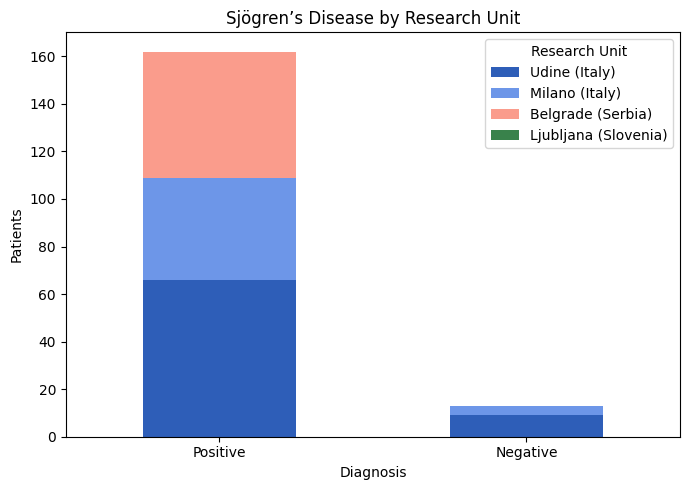

In [14]:
positivos = df[df['Label_pSS'] == '1']['Center'].value_counts()
negativos = df[df['Label_pSS'] == '0']['Center'].value_counts()

# Criar DataFrame para gráfico
data = pd.DataFrame({
    'Udine (Italy)': [positivos.get('Udine (Italy)', 0), negativos.get('Udine (Italy)', 0)],
    'Milano (Italy)': [positivos.get('Milano (Italy)', 0), negativos.get('Milano (Italy)', 0)],
    'Belgrade (Serbia)': [positivos.get('Belgrade (Serbia)', 0), negativos.get('Belgrade (Serbia)', 0)],
    'Ljubljana (Slovenia)': [positivos.get('Ljubljana (Slovenia)	', 0), negativos.get('Ljubljana (Slovenia)	', 0)]
}, index=['Positive', 'Negative'])
data.plot(kind='bar', stacked=True, color=['#2e5eb8', '#6d96e8','#fa9c8c', '#39824b'], figsize=(7, 5))

# Personalizar gráfico
plt.title('Sjögren’s Disease by Research Unit')
plt.xlabel('Diagnosis')
plt.ylabel('Patients')
plt.xticks(rotation=0)
plt.legend(title='Research Unit')

plt.tight_layout()

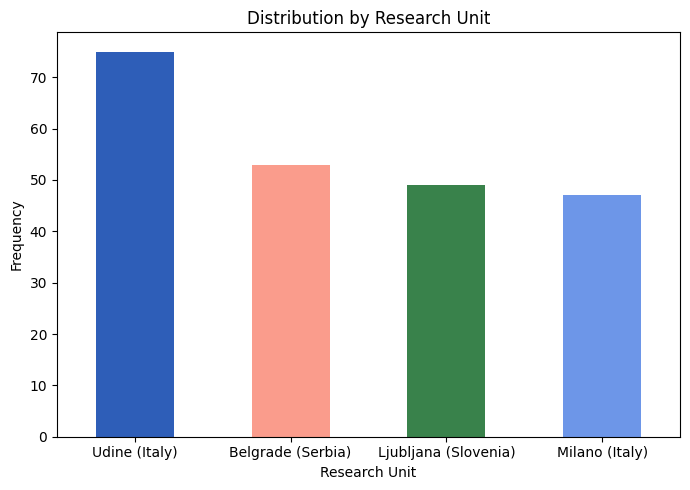

In [15]:
df['Center'].value_counts().plot(kind='bar', figsize=(7, 5), color=['#2e5eb8', '#fa9c8c', '#39824b', '#6d96e8'])
plt.title('Distribution by Research Unit')
plt.xlabel('Research Unit')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.tight_layout()


### Scores

In [16]:
df['DeVita_Score'].value_counts()

,count
DeVita_Score,
0,109
2,55
3,32
1,28


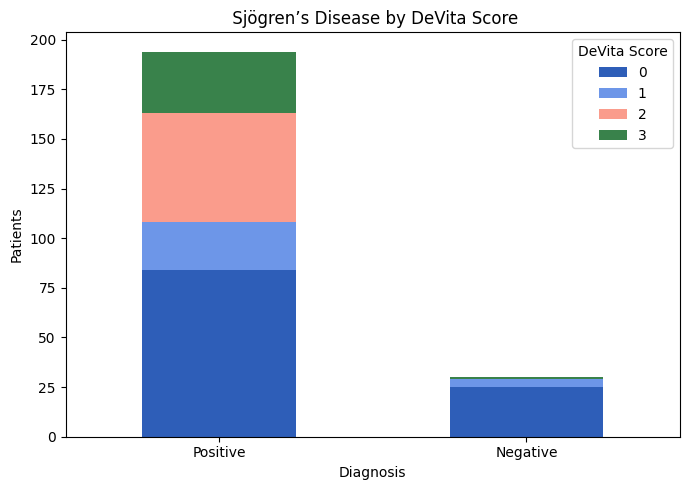

In [17]:
positivos = df[df['Label_pSS'] == '1']['DeVita_Score'].value_counts()
negativos = df[df['Label_pSS'] == '0']['DeVita_Score'].value_counts()

# Criar DataFrame para gráfico
data = pd.DataFrame({
    '0': [positivos.get(0, 0), negativos.get(0, 0)],
    '1': [positivos.get(1, 0), negativos.get(1, 0)],
    '2': [positivos.get(2, 0), negativos.get(2, 0)],
    '3': [positivos.get(3, 0), negativos.get(3, 0)]
}, index=['Positive', 'Negative'])
data.plot(kind='bar', stacked=True, color=['#2e5eb8', '#6d96e8','#fa9c8c', '#39824b'], figsize=(7, 5))

# Personalizar gráfico
plt.title(' Sjögren’s Disease by DeVita Score')
plt.xlabel('Diagnosis')
plt.ylabel('Patients')
plt.xticks(rotation=0)
plt.legend(title='DeVita Score')

plt.tight_layout()

In [18]:
df['Omeract_Score'].value_counts()

,count
Omeract_Score,
0,92
3,53
2,47
1,32


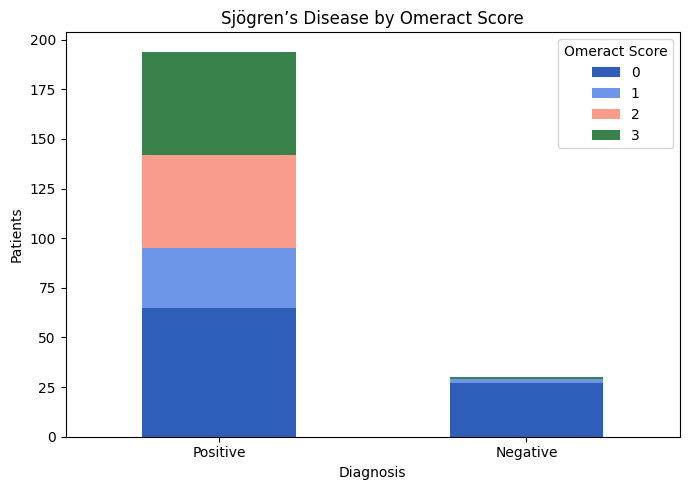

In [19]:
positivos = df[df['Label_pSS'] == '1']['Omeract_Score'].value_counts()
negativos = df[df['Label_pSS'] == '0']['Omeract_Score'].value_counts()

# Criar DataFrame para gráfico
data = pd.DataFrame({
    '0': [positivos.get(0, 0), negativos.get(0, 0)],
    '1': [positivos.get(1, 0), negativos.get(1, 0)],
    '2': [positivos.get(2, 0), negativos.get(2, 0)],
    '3': [positivos.get(3, 0), negativos.get(3, 0)]
}, index=['Positive', 'Negative'])
data.plot(kind='bar', stacked=True, color=['#2e5eb8', '#6d96e8','#fa9c8c', '#39824b'], figsize=(7, 5))

# Personalizar gráfico
plt.title('Sjögren’s Disease by Omeract Score')
plt.xlabel('Diagnosis')
plt.ylabel('Patients')
plt.xticks(rotation=0)
plt.legend(title='Omeract Score')

plt.tight_layout()

## 3. Pre Processamento

### Separar Treino e Teste

In [20]:
df.columns

Index(['Center', 'ID', 'Gland_Type', 'Machine', 'DeVita_Score',
       'Omeract_Score', 'Sex', 'Age', 'Disease_Duration', 'Label_pSS', 'Image',
       'Faixa_Etaria'],
      dtype='object')

In [21]:
df = df[['ID', 'Sex', 'Age', 'Label_pSS', 'Image','Faixa_Etaria']]

In [22]:
# Caminhos
origem_imagens = dir+"/images"
destino_base = dir
# Divide em treino/teste mantendo o balanceamento por classe
train_df, test_df = train_test_split(df, test_size=0.3, stratify=df['Label_pSS'], random_state=42)

### Percentual de Sexo por Classe Test

In [23]:
def copiar_imagens(dataframe, tipo):
    for _, row in dataframe.iterrows():
        nome_arquivo = row['Image']
        classe = row['Label_pSS']
        origem = os.path.join(origem_imagens, nome_arquivo)
        if(tipo == 'train'):
          destino_dir = os.path.join(destino_base, tipo, classe)
        else:
          destino_dir = os.path.join(destino_base, tipo)
        os.makedirs(destino_dir, exist_ok=True)
        destino = os.path.join(destino_dir, nome_arquivo)
        shutil.copy2(origem, destino)
# Copiando
copiar_imagens(train_df, 'train')
copiar_imagens(test_df, 'test')

In [24]:
train_df['Base'] = 'train'
test_df['Base'] = 'test'

#Concatenar dataset
df_concat = pd.concat([train_df, test_df], ignore_index=True)

df_full = pd.merge(df, df_concat, on="Image", how="left")

df_full = pd.merge(df, df_concat[['Image', 'Base']], on="Image", how="left")

## Analises Base

### Percentual de Sexo por Classe Treino

In [25]:
# df_full= pd.read_csv('/content/drive/MyDrive/0_Mestrado_unifesp/3_Pesquisa/Experimentos/Code/HarmonicSS_Split_V3.csv')
# # Coluna de rótulo convertida para texto
# df_full['Label_pSS'] = df_full['Label_pSS'].astype(str)
# df_full.head()
# train_df = df_full[df_full['Base']=='train']
# test_df = df_full[df_full['Base']=='test']

### Distribuição Classe

In [26]:
tabela_percentual = (
    train_df.groupby(['Label_pSS', 'Sex'])
    .size()
    .groupby(level=0)
    .apply(lambda x: 100 * x / x.sum())
    .unstack(fill_value=0)  # Coloca os gêneros como colunas
    .round(2)
)
tabela_percentual

,Sex,F,M
Label_pSS,Label_pSS,,
0,0,85.71,14.29
1,1,90.37,9.63


In [27]:
tabela_percentual = (
    train_df.groupby(['Label_pSS', 'Faixa_Etaria'])
    .size()
    .groupby(level=0)
    .apply(lambda x: 100 * x / x.sum())
    .unstack(fill_value=0)  # Coloca os gêneros como colunas
    .round(2)
)
tabela_percentual

,Faixa_Etaria,Above 40,Under 40
Label_pSS,Label_pSS,,
0,0,100.00,0.00
1,1,87.41,12.59


In [28]:
tabela_percentual = (
    test_df.groupby(['Label_pSS', 'Sex'])
    .size()
    .groupby(level=0)
    .apply(lambda x: 100 * x / x.sum())
    .unstack(fill_value=0)  # Coloca os gêneros como colunas
    .round(2)
)
tabela_percentual

,Sex,F,M
Label_pSS,Label_pSS,,
0,0,88.89,11.11
1,1,88.14,11.86


In [29]:
tabela_percentual = (
    test_df.groupby(['Label_pSS', 'Faixa_Etaria'])
    .size()
    .groupby(level=0)
    .apply(lambda x: 100 * x / x.sum())
    .unstack(fill_value=0)  # Coloca os gêneros como colunas
    .round(2)
)
tabela_percentual

,Faixa_Etaria,Above 40,Under 40
Label_pSS,Label_pSS,,
0,0,100.00,0.00
1,1,88.14,11.86


### Doença de Sjogren

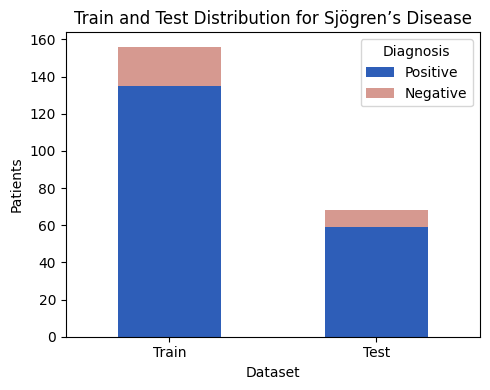

In [30]:
positivos = df_full[df_full['Base'] == 'train']['Label_pSS'].value_counts()
negativos = df_full[df_full['Base'] == 'test']['Label_pSS'].value_counts()

# Criar DataFrame para gráfico
data = pd.DataFrame({
    'Positive': [positivos.get('1', 0), negativos.get('1', 0)],
    'Negative': [positivos.get('0', 0), negativos.get('0', 0)]
}, index=['Train', 'Test'])
data.plot(kind='bar', stacked=True, color=['#2e5eb8', '#d69990'], figsize=(5, 4))

# Personalizar gráfico
plt.title('Train and Test Distribution for Sjögren’s Disease')
plt.xlabel('Dataset')
plt.ylabel('Patients')
plt.xticks(rotation=0)
plt.legend(title='Diagnosis')

plt.tight_layout()

### Distribuição por Genero

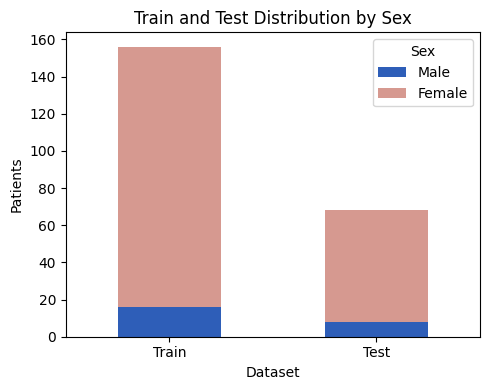

In [31]:
positivos = df_full[df_full['Base'] == 'train']['Sex'].value_counts()
negativos = df_full[df_full['Base'] == 'test']['Sex'].value_counts()

# Criar DataFrame para gráfico
data = pd.DataFrame({
    'Male': [positivos.get('M', 0), negativos.get('M', 0)],
    'Female': [positivos.get('F', 0), negativos.get('F', 0)]
}, index=['Train', 'Test'])
data.plot(kind='bar', stacked=True, color=['#2e5eb8', '#d69990'], figsize=(5, 4))

# Personalizar gráfico
plt.title('Train and Test Distribution by Sex')
plt.xlabel('Dataset')
plt.ylabel('Patients')
plt.xticks(rotation=0)
plt.legend(title='Sex')

plt.tight_layout()

### Distribuição por idade

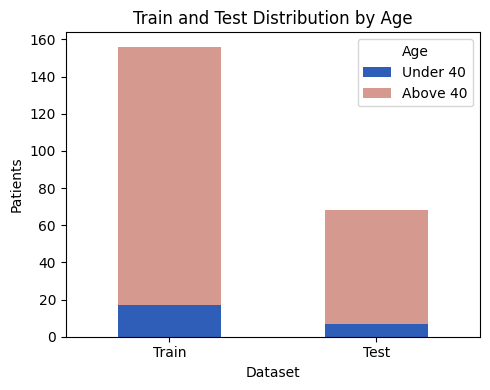

In [32]:
positivos = df_full[df_full['Base'] == 'train']['Faixa_Etaria'].value_counts()
negativos = df_full[df_full['Base'] == 'test']['Faixa_Etaria'].value_counts()

# Criar DataFrame para gráfico
data = pd.DataFrame({
    'Under 40': [positivos.get('Under 40', 0), negativos.get('Under 40', 0)],
    'Above 40': [positivos.get('Above 40', 0), negativos.get('Above 40', 0)]
}, index=['Train', 'Test'])
data.plot(kind='bar', stacked=True, color=['#2e5eb8', '#d69990'], figsize=(5, 4))

# Personalizar gráfico
plt.title('Train and Test Distribution by Age')
plt.xlabel('Dataset')
plt.ylabel('Patients')
plt.xticks(rotation=0)
plt.legend(title='Age')

plt.tight_layout()

## Export Files

In [33]:
df_full.to_csv('/content/drive/MyDrive/0_Mestrado_unifesp/3_Pesquisa/Experimentos/Code/HarmonicSS_Split_V4.csv', index=False)